In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("star_classification.csv")
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.240000e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,GALAXY,0.634794,5812,56354,171
1,1.240000e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,GALAXY,0.779136,10445,58158,427
2,1.240000e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,GALAXY,0.644195,4576,55592,299
3,1.240000e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,GALAXY,0.932346,9149,58039,775
4,1.240000e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.890000e+18,GALAXY,0.116123,6121,56187,842


In [3]:
tempClass = df["class"]
tempClass
df.drop("class",1, inplace=True)
df["class"] = tempClass
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,1.240000e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY


In [ ]:
#df.iloc[:,1:5 ].info(exclude=["object"])

In [4]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate',
       'MJD', 'fiber_ID', 'class'],
      dtype='object')

In [5]:
df.shape

(100000, 18)

In [6]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
class           object
dtype: object

In [7]:
df.count()

obj_ID         100000
alpha          100000
delta          100000
u              100000
g              100000
r              100000
i              100000
z              100000
run_ID         100000
rerun_ID       100000
cam_col        100000
field_ID       100000
spec_obj_ID    100000
redshift       100000
plate          100000
MJD            100000
fiber_ID       100000
class          100000
dtype: int64

In [8]:
df["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

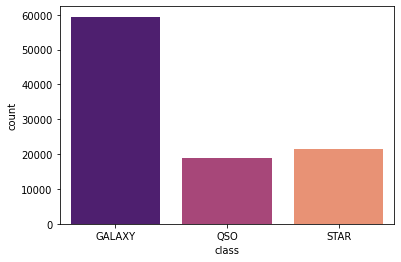

In [9]:
sns.countplot(x = 'class', data = df, palette='magma')

## Encoding target values.

In [10]:
# Label Encoder is used for mapping categorical data into 1, 2, 3, 4, 5, 6..
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
le_encoder.fit(df['class'].drop_duplicates())
df['class'] = le_encoder.transform(df['class'])
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,1.240000e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,0
1,1.240000e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,0
2,1.240000e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,0
3,1.240000e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,0
4,1.240000e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.890000e+18,0.116123,6121,56187,842,0


In [ ]:
#list(le_encoder.inverse_transform(df["class"]))

In [11]:
df.drop("rerun_ID",1,inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,1.240000e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.540000e+18,0.634794,5812,56354,171,0
1,1.240000e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.180000e+19,0.779136,10445,58158,427,0
2,1.240000e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.150000e+18,0.644195,4576,55592,299,0
3,1.240000e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030000e+19,0.932346,9149,58039,775,0
4,1.240000e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.890000e+18,0.116123,6121,56187,842,0


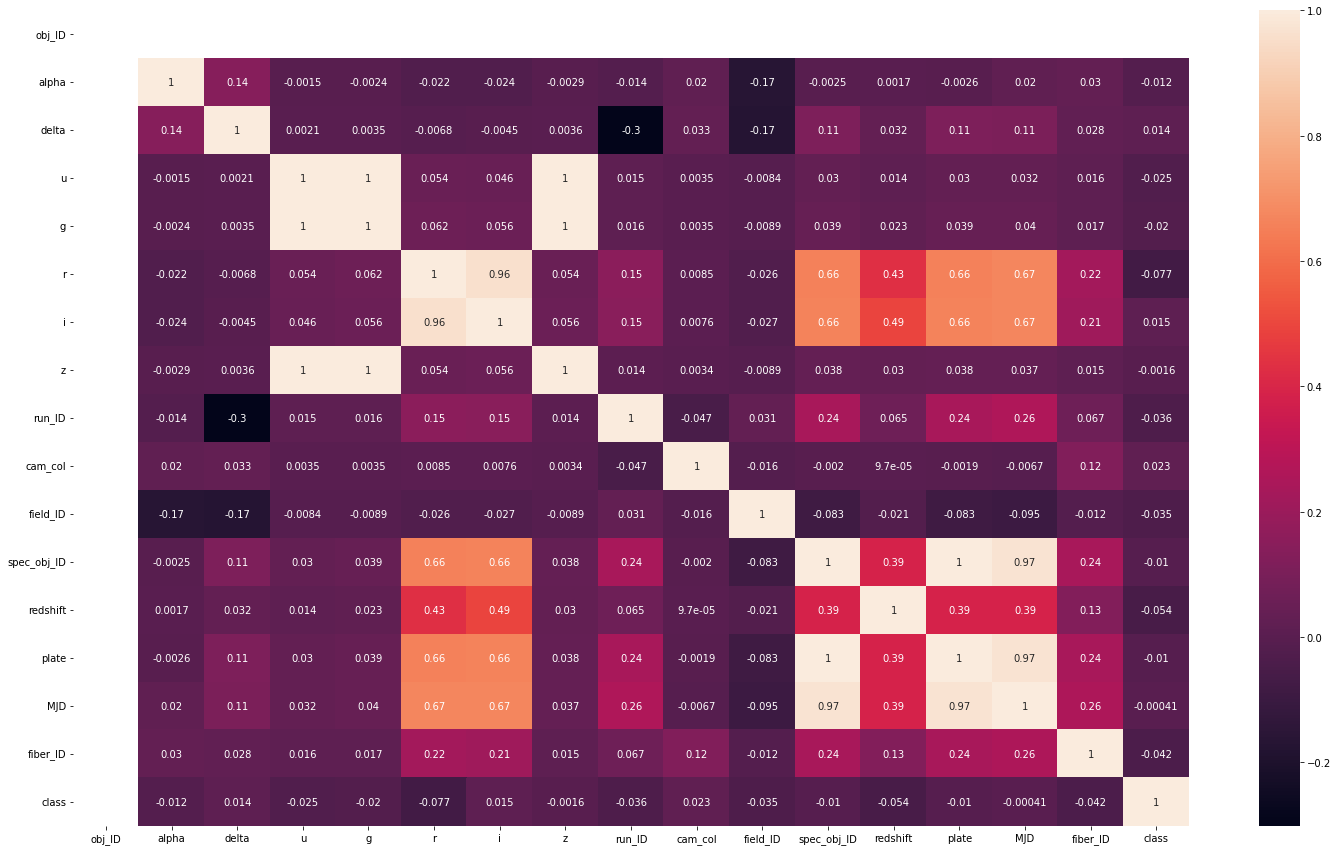

In [12]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr('pearson'), annot = True)

## Removing outliers.

In [13]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df) 

In [14]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

#threshold
threshold2 = -1.5                                            
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

In [15]:
len(outlier_index)

1248

In [16]:
df.drop(outlier_index, inplace=True)

In [17]:
corr = df.corr()

In [18]:
corr["class"].sort_values()

r             -0.079069
redshift      -0.055038
fiber_ID      -0.042071
run_ID        -0.037846
field_ID      -0.033829
u             -0.024734
g             -0.020183
spec_obj_ID   -0.013247
plate         -0.013153
alpha         -0.012144
MJD           -0.004722
z             -0.001718
i              0.013905
delta          0.014854
cam_col        0.023524
class          1.000000
obj_ID              NaN
Name: class, dtype: float64

In [20]:
df2 = df.drop(['obj_ID','alpha','delta','run_ID','cam_col','field_ID','fiber_ID','delta','r'], axis = 1)
df3 = df.drop(['obj_ID','alpha','delta','run_ID','cam_col','field_ID','fiber_ID','delta','r','spec_obj_ID','plate','i'], axis = 1)
df = df.drop(['obj_ID','alpha','delta','run_ID','cam_col','field_ID','fiber_ID'], axis = 1)

## Balancing Target Values using SMOTE

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [22]:
x = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values

In [23]:
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 58595, 2: 21322, 1: 18835})
Resampled dataset shape Counter({0: 58595, 1: 58595, 2: 58595})


In [24]:
new_df = pd.concat([x,pd.DataFrame(y.tolist(),columns=["class"])], axis = 1)
new_df.head()

,u,g,r,i,z,spec_obj_ID,redshift,plate,MJD,class
0,23.87882,22.27530,20.39501,19.16573,18.79371,6.540000e+18,0.634794,5812,56354,0
1,24.77759,22.83188,22.58444,21.16812,21.61427,1.180000e+19,0.779136,10445,58158,0
2,25.26307,22.66389,20.60976,19.34857,18.94827,5.150000e+18,0.644195,4576,55592,0
3,22.13682,23.77656,21.61162,20.50454,19.25010,1.030000e+19,0.932346,9149,58039,0
4,19.43718,17.58028,16.49747,15.97711,15.54461,6.890000e+18,0.116123,6121,56187,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


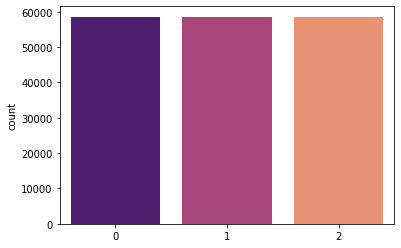

In [25]:
sns.countplot(y, palette='magma')

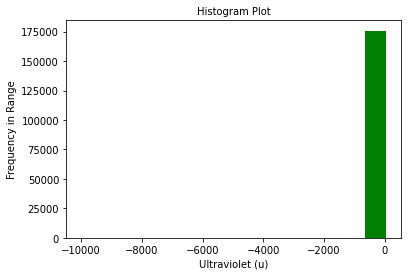

In [26]:
plt.hist(new_df['u'], bins = 15, color = 'green')
plt.title("Histogram Plot", fontsize = 10)
plt.xlabel("Ultraviolet (u)")
plt.ylabel("Frequency in Range")
plt.show()

In [ ]:
#sns.scatterplot(x = 'r', y = 'g', data = new_df, hue ='class', palette='plasma')

## Scalinig the Data.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

## SVM Kernel = "poly"

In [30]:
from sklearn import svm
model = svm.SVC(kernel='poly', degree=2)
model.fit(x_train, y_train)

SVC(degree=2, kernel='poly')

In [31]:
y_pred = model.predict(x_test)

In [32]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.79      0.86     22941
           1       0.72      0.83      0.77     16764
           2       0.86      0.90      0.88     18305

    accuracy                           0.84     58010
   macro avg       0.84      0.84      0.84     58010
weighted avg       0.85      0.84      0.84     58010



In [33]:
model.score(x_test, y_test)

0.8371315290467161

In [109]:
svmPolyacc = accuracy_score(y_test, y_pred)
svmPolyacc

0.8371315290467161

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


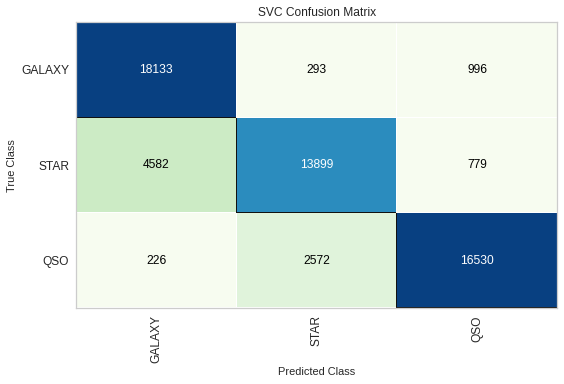

In [35]:
classes = ['GALAXY','STAR','QSO']
svm_cm = ConfusionMatrix(model, classes=classes, cmap='GnBu')
svm_cm.score(x_test, y_test)
svm_cm.show()

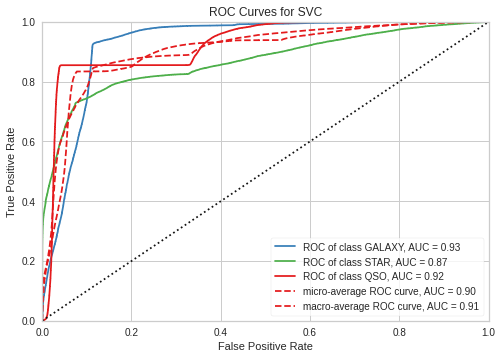

In [36]:
visualizer = ROCAUC(model, classes=classes)

set_palette('bold')

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()    

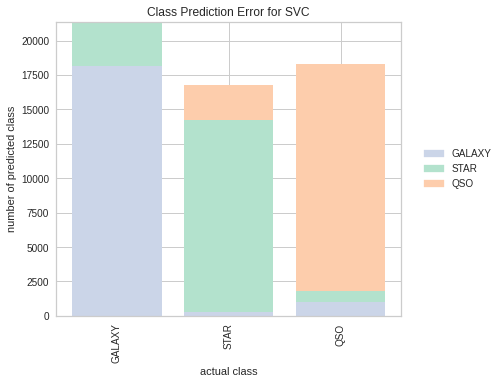

In [37]:
visualizer = ClassPredictionError(model, classes=classes)

set_palette('pastel')

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

## SVM Kernel = "RBF"

In [38]:
svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.966


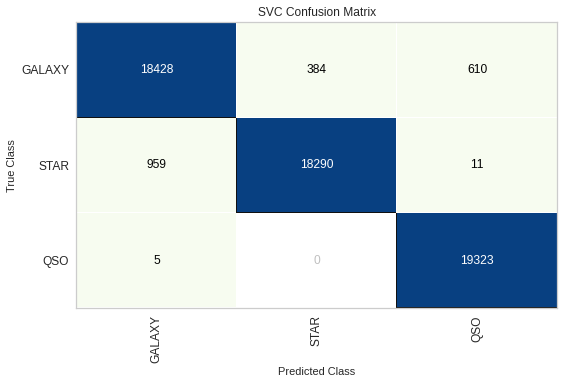

In [39]:
svm_cm = ConfusionMatrix(svm_clf, classes=classes, cmap='GnBu')

svm_cm.fit(x_train, y_train)
svm_cm.score(x_test, y_test)
svm_cm.show()

In [40]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     19422
           1       0.98      0.95      0.96     19260
           2       0.97      1.00      0.98     19328

    accuracy                           0.97     58010
   macro avg       0.97      0.97      0.97     58010
weighted avg       0.97      0.97      0.97     58010



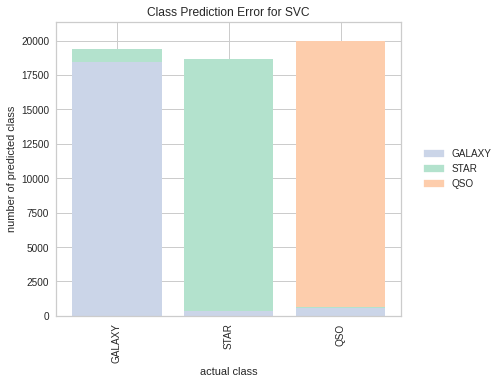

In [41]:
visualizer = ClassPredictionError(svm_clf, classes=classes)

set_palette('pastel')

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(C = 10, max_iter=100, solver='liblinear',tol=0.001,random_state=0)

In [43]:
logit_model.fit(x_train, y_train)
print('Intercept : ', logit_model.intercept_)
print('Slope : ', logit_model.coef_)

Intercept :  [ -1.13679714  -0.29827087 -78.64208893]
Slope :  [[ 1.59212041e-01  4.95103951e+01 -2.48987049e+00 -1.45236145e+00
   8.69908711e-01  1.57891156e+01 -1.18129938e-01 -1.51878245e+01
  -6.22296660e-01]
 [-1.49561295e+01 -4.80912362e+00 -2.15658921e+00  1.43160698e+00
   1.97439683e+01 -1.06461696e+00  6.85077590e+00  4.62239131e-01
   1.95650437e-01]
 [ 7.59091317e+00 -6.36674786e+00  3.60149576e-01  3.29650662e-03
  -1.22165489e+00 -8.35409403e-01 -1.01273061e+02 -9.37359320e-01
   1.81529034e+00]]


In [44]:
# Use the model to predict the test dataset.
y_logit_model_pred_test = logit_model.predict(x_test)
# Use the model to predict the train dataset.
y_logit_model_pred_train = logit_model.predict(x_train)

In [45]:
report = classification_report(y_logit_model_pred_test, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     18403
           1       0.96      0.93      0.95     19786
           2       1.00      0.97      0.98     19821

    accuracy                           0.95     58010
   macro avg       0.95      0.95      0.95     58010
weighted avg       0.95      0.95      0.95     58010



In [47]:
score_Logit = logit_model.score(x_test, y_test)
logit_score_ = np.mean(score_Logit)

print('Accuracy : %.3f' % (logit_score_))

Accuracy : 0.953


## Random Forest

In [48]:
r_forest = RandomForestClassifier()
r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.983


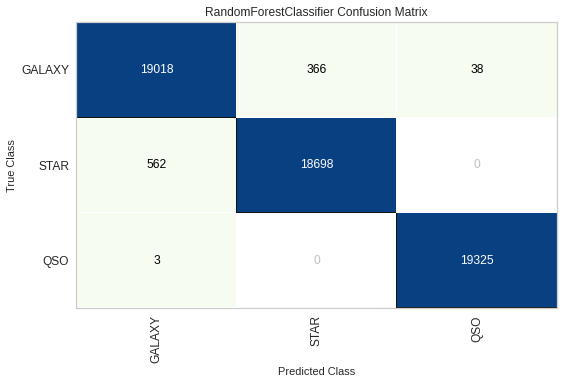

In [49]:
classes = ['GALAXY','STAR','QSO']
r_forest_cm = ConfusionMatrix(r_forest, classes=classes, cmap='GnBu')

r_forest_cm.fit(x_train, y_train)
r_forest_cm.score(x_test, y_test)
r_forest_cm.show()

In [50]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     19422
           1       0.98      0.97      0.98     19260
           2       1.00      1.00      1.00     19328

    accuracy                           0.98     58010
   macro avg       0.98      0.98      0.98     58010
weighted avg       0.98      0.98      0.98     58010



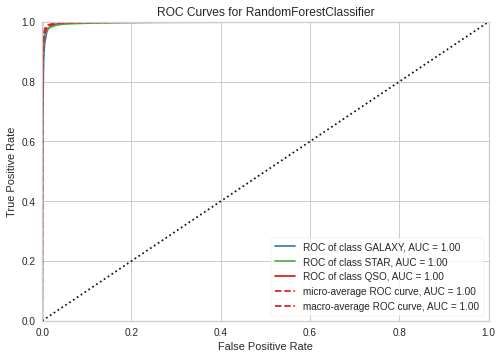

In [51]:
visualizer = ROCAUC(r_forest, classes=["GALAXY", "STAR", "QSO"])

set_palette('bold')

visualizer.fit(x_train, y_train)       
visualizer.score(x_test, y_test)        
visualizer.show() 

## Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier()
dtree_model.fit(x_train,y_train)
predictedDT = dtree_model.predict(x_test)
score = dtree_model.score(x_test, y_test)
dt_score_ = np.mean(score)

print('Accuracy : %.3f' % (dt_score_))

Accuracy : 0.972


## Deep Learning

In [52]:
x[0].shape

(9,)

In [53]:
y.shape

(175785,)

In [54]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cv2
import os

In [82]:
ann = models.Sequential([
    layers.Dense(30, activation='relu', input_shape=(9,)),
    layers.Dense(20, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [83]:
ann.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [84]:
val_data=(x_test,y_test)
ann.fit(x_train, y_train, epochs=10, validation_data=val_data, shuffle=True)

Epoch 1/10
3681/3681 [==============================] - 15s 4ms/step - loss: 0.2221 - accuracy: 0.9338 - val_loss: 0.1257 - val_accuracy: 0.9575
Epoch 2/10
3681/3681 [==============================] - 10s 3ms/step - loss: 0.1383 - accuracy: 0.9646 - val_loss: 0.1107 - val_accuracy: 0.9660
Epoch 3/10
3681/3681 [==============================] - 10s 3ms/step - loss: 0.1044 - accuracy: 0.9676 - val_loss: 0.1021 - val_accuracy: 0.9672
Epoch 4/10
3681/3681 [==============================] - 9s 2ms/step - loss: 0.0964 - accuracy: 0.9696 - val_loss: 0.0941 - val_accuracy: 0.9698
Epoch 5/10
3681/3681 [==============================] - 10s 3ms/step - loss: 0.0938 - accuracy: 0.9705 - val_loss: 0.0925 - val_accuracy: 0.9724
Epoch 6/10
3681/3681 [==============================] - 9s 3ms/step - loss: 0.0912 - accuracy: 0.9711 - val_loss: 0.0886 - val_accuracy: 0.9718
Epoch 7/10
3681/3681 [==============================] - 11s 3ms/step - loss: 0.0891 - accuracy: 0.9720 - val_loss: 0.1044 - val_accu

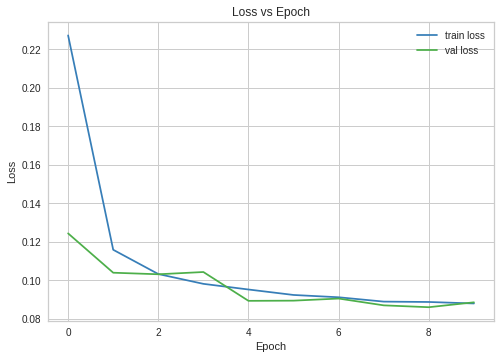

In [58]:
# plot the loss
plt.plot(ann.history.history['loss'], label='train loss')
plt.plot(ann.history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()
#plt.savefig('LossVal_loss')

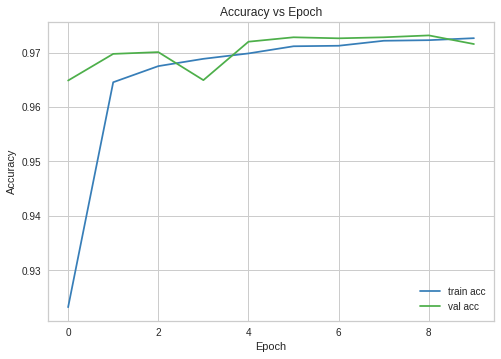

In [59]:
# plot the accuracy
plt.plot(ann.history.history['accuracy'], label='train acc')
plt.plot(ann.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.show()
#plt.savefig('AccVal_acc')

In [111]:
ann_loss,ann_score_ = ann.evaluate(x_test,y_test)

1813/1813 [==============================] - 5s 3ms/step - loss: 0.0841 - accuracy: 0.9738


In [112]:
ann_score_

0.973797619342804

## MLP Classifier

In [140]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(7)
mlp.fit(x_train, y_train)
prediction_mlp = mlp.predict(x_test)

In [141]:
mlp_score_ = accuracy_score(y_test, prediction_mlp)
mlp_score_

0.9726254094121703

## Comparison

In [149]:
var1 = svmPolyacc * 100
var2 = svm_score_ * 100
var3 = logit_score_ * 100
var4 = rf_score_ * 100
var5 = dt_score_ * 100
var6 = ann_score_ * 100
var7 = mlp_score_ * 100


In [150]:
def addlabels(x,y):
  for i in range(len(x)):
    plt.text(i,y[i],y[i])

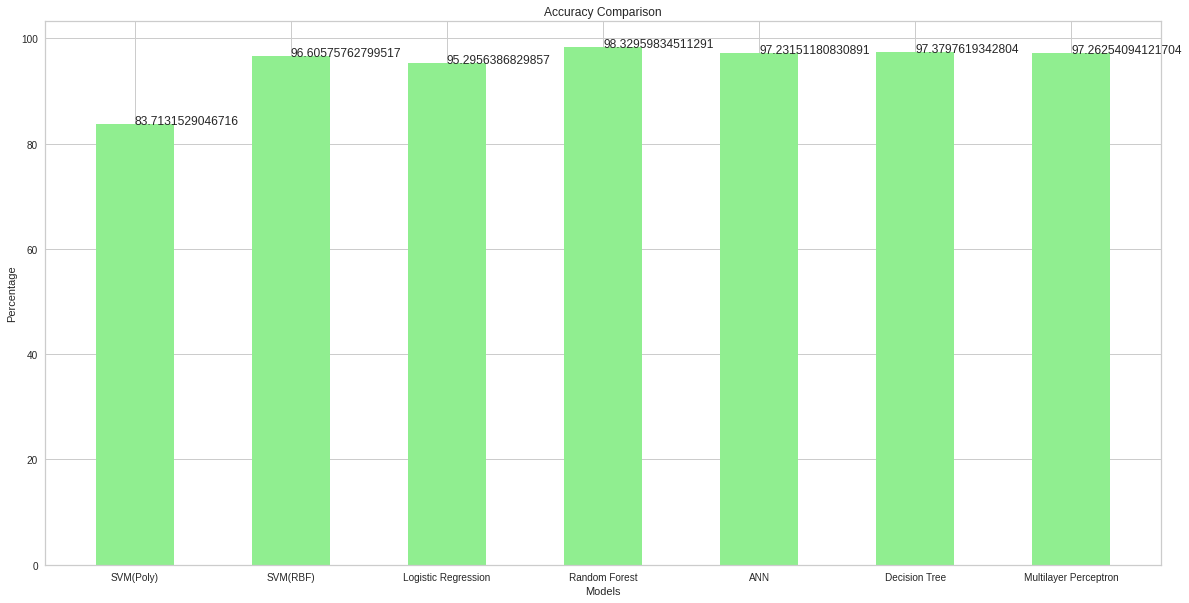

In [152]:
import numpy as np
import matplotlib.pyplot as plt
# Dataset generation
data_dict = {'SVM(Poly)':var1, 'SVM(RBF)':var2, 'Logistic Regression':var3, 'Random Forest':var4 , 'ANN':var5 , 'Decision Tree':var6,'Multilayer Perceptron':var7 }
models = list(data_dict.keys())
values = list(data_dict.values())

fig = plt.figure(figsize = (20, 10))
#  Bar plot
plt.bar(models, values, color ='lightgreen',width = 0.5)
addlabels(models,values)
plt.xlabel("Models")
plt.ylabel("Percentage")
plt.title("Accuracy Comparison")
plt.show()

## Creating two datasets with less features

## Balancing Target Values using SMOTE

In [61]:
df2.columns

Index(['u', 'g', 'i', 'z', 'spec_obj_ID', 'redshift', 'plate', 'MJD', 'class'], dtype='object')

In [62]:
df3.columns

Index(['u', 'g', 'z', 'redshift', 'MJD', 'class'], dtype='object')

In [63]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [64]:
x2 = df2.drop(['class'], axis = 1)
y2 = df2.loc[:,'class'].values
x3 = df3.drop(['class'], axis = 1)
y3 = df3.loc[:,'class'].values

In [65]:
sm2 = SMOTE(random_state=42)
print('Original dataset df2 shape %s' % Counter(y2))
x2, y2 = sm2.fit_resample(x2, y2)
print('Resampled dataset df2 shape %s' % Counter(y2))
sm3 = SMOTE(random_state=42)
print('Original dataset df3 shape %s' % Counter(y3))
x3, y3 = sm.fit_resample(x3, y3)
print('Resampled dataset df3 shape %s' % Counter(y3))

Original dataset df2 shape Counter({0: 58595, 2: 21322, 1: 18835})
Resampled dataset df2 shape Counter({0: 58595, 1: 58595, 2: 58595})
Original dataset df3 shape Counter({0: 58595, 2: 21322, 1: 18835})
Resampled dataset df3 shape Counter({0: 58595, 1: 58595, 2: 58595})


In [66]:
new_df2 = pd.concat([x2,pd.DataFrame(y2.tolist(),columns=["class"])], axis = 1)
new_df3 = pd.concat([x3,pd.DataFrame(y3.tolist(),columns=["class"])], axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


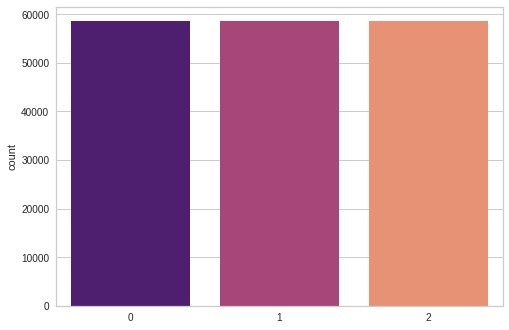

In [67]:
sns.countplot(y2, palette='magma')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


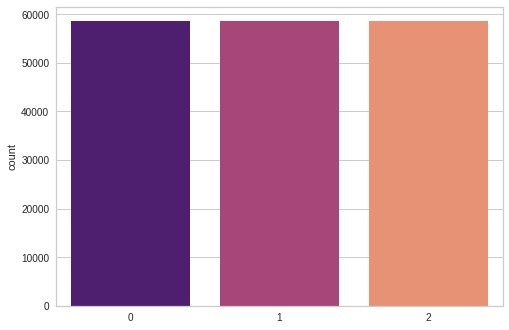

In [68]:
sns.countplot(y3, palette='magma')

## Scalinig the Data.

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x2)
x2 = scaler.transform(x2)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x3)
x3 = scaler.transform(x3)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

In [73]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.33, random_state = 42)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.33, random_state = 42)

## Random Forest model with less features

In [74]:
r2_forest = RandomForestClassifier()
r2_forest.fit(x2_train,y2_train)
predicted2 = r2_forest.predict(x2_test)
score2 = r2_forest.score(x2_test, y2_test)
rf2_score_ = np.mean(score2)

print('Accuracy : %.3f' % (rf2_score_))

Accuracy : 0.982


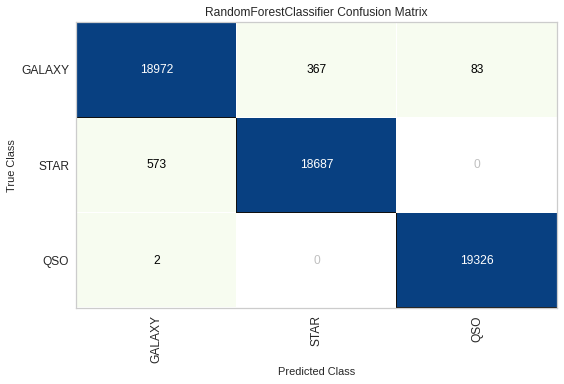

In [76]:
classes = ['GALAXY','STAR','QSO']
r2_forest_cm = ConfusionMatrix(r2_forest, classes=classes, cmap='GnBu')

r2_forest_cm.fit(x2_train, y2_train)
r2_forest_cm.score(x2_test, y2_test)
r2_forest_cm.show()

In [79]:
r3_forest = RandomForestClassifier()
r3_forest.fit(x3_train,y3_train)
predicted3 = r3_forest.predict(x3_test)
score3 = r3_forest.score(x3_test, y3_test)
rf3_score_ = np.mean(score3)

print('Accuracy : %.3f' % (rf3_score_))

Accuracy : 0.980


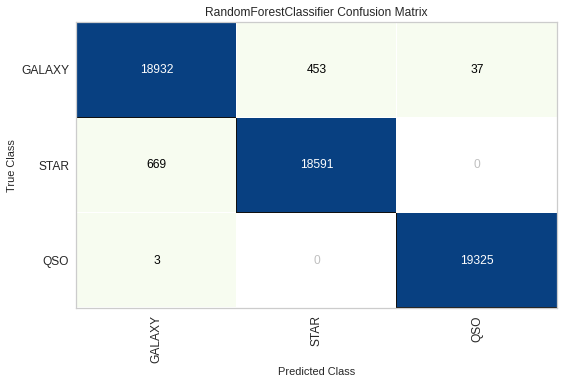

In [80]:
classes = ['GALAXY','STAR','QSO']
r3_forest_cm = ConfusionMatrix(r3_forest, classes=classes, cmap='GnBu')

r3_forest_cm.fit(x3_train, y3_train)
r3_forest_cm.score(x3_test, y3_test)
r3_forest_cm.show()

## Deep learning model with less features

In [86]:
ann2 = models.Sequential([
    layers.Dense(30, activation='relu', input_shape=(8,)),
    layers.Dense(20, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [87]:
ann2.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [88]:
val_data2=(x2_test,y2_test)
ann2.fit(x2_train, y2_train, epochs=10, validation_data=val_data2, shuffle=True)

Epoch 1/10
3681/3681 [==============================] - 10s 3ms/step - loss: 0.2749 - accuracy: 0.9333 - val_loss: 0.1191 - val_accuracy: 0.9628
Epoch 2/10
3681/3681 [==============================] - 9s 3ms/step - loss: 0.1526 - accuracy: 0.9638 - val_loss: 0.1113 - val_accuracy: 0.9624
Epoch 3/10
3681/3681 [==============================] - 9s 2ms/step - loss: 0.1144 - accuracy: 0.9665 - val_loss: 0.0974 - val_accuracy: 0.9691
Epoch 4/10
3681/3681 [==============================] - 9s 2ms/step - loss: 0.0985 - accuracy: 0.9686 - val_loss: 0.0944 - val_accuracy: 0.9697
Epoch 5/10
3681/3681 [==============================] - 9s 2ms/step - loss: 0.0958 - accuracy: 0.9695 - val_loss: 0.0916 - val_accuracy: 0.9716
Epoch 6/10
3681/3681 [==============================] - 9s 2ms/step - loss: 0.0937 - accuracy: 0.9706 - val_loss: 0.0892 - val_accuracy: 0.9715
Epoch 7/10
3681/3681 [==============================] - 9s 2ms/step - loss: 0.0920 - accuracy: 0.9706 - val_loss: 0.0925 - val_accuracy

In [157]:
ann2_loss,ann2_score_ = ann2.evaluate(x2_test,y2_test)

1813/1813 [==============================] - 5s 3ms/step - loss: 0.0873 - accuracy: 0.9729


In [158]:
ann2_score_

0.9729184508323669

In [93]:
ann3 = models.Sequential([
    layers.Dense(30, activation='relu', input_shape=(5,)),
    layers.Dense(20, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [108]:
ann3.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [95]:
val_data3=(x3_test,y3_test)
ann3.fit(x3_train, y3_train, epochs=10, validation_data=val_data3, shuffle=True)

Epoch 1/10
3681/3681 [==============================] - 11s 3ms/step - loss: 0.3054 - accuracy: 0.9346 - val_loss: 0.1201 - val_accuracy: 0.9641
Epoch 2/10
3681/3681 [==============================] - 9s 2ms/step - loss: 0.1911 - accuracy: 0.9651 - val_loss: 0.1169 - val_accuracy: 0.9648
Epoch 3/10
3681/3681 [==============================] - 9s 2ms/step - loss: 0.1496 - accuracy: 0.9676 - val_loss: 0.1057 - val_accuracy: 0.9665
Epoch 4/10
3681/3681 [==============================] - 10s 3ms/step - loss: 0.1118 - accuracy: 0.9684 - val_loss: 0.1026 - val_accuracy: 0.9694
Epoch 5/10
3681/3681 [==============================] - 9s 2ms/step - loss: 0.1001 - accuracy: 0.9694 - val_loss: 0.1038 - val_accuracy: 0.9659
Epoch 6/10
3681/3681 [==============================] - 9s 2ms/step - loss: 0.0979 - accuracy: 0.9702 - val_loss: 0.0974 - val_accuracy: 0.9701
Epoch 7/10
3681/3681 [==============================] - 9s 2ms/step - loss: 0.0961 - accuracy: 0.9706 - val_loss: 0.0965 - val_accurac

In [159]:
ann3_loss,ann3_score_ = ann3.evaluate(x3_test,y3_test)

1813/1813 [==============================] - 5s 3ms/step - loss: 0.0932 - accuracy: 0.9708


In [160]:
ann3_score_

0.9707809090614319

## Random Forest model comparison

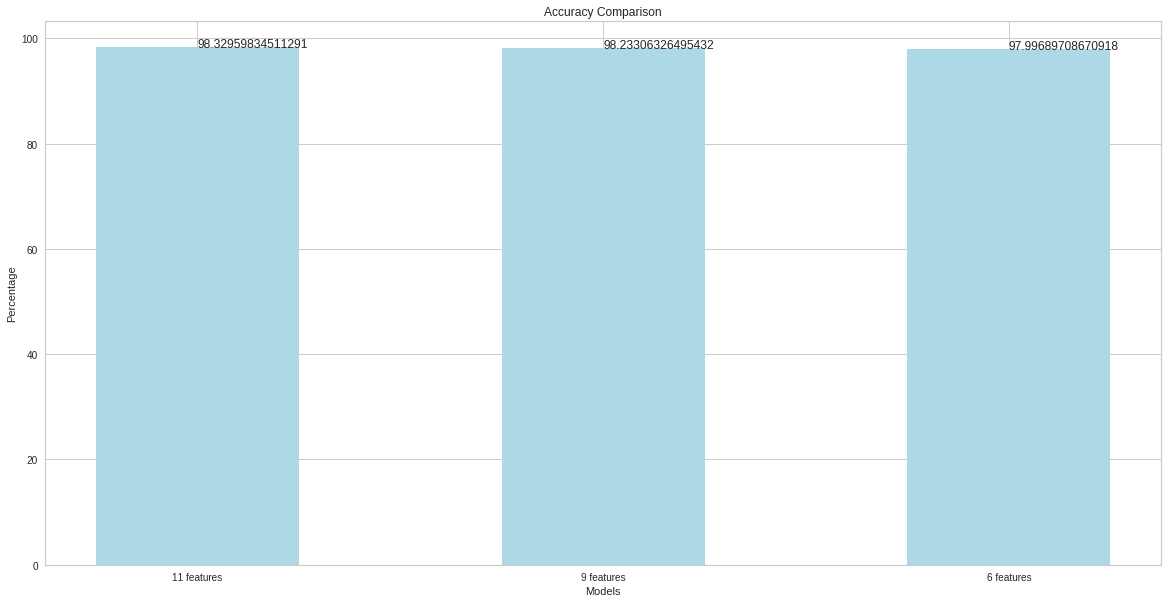

In [156]:
data_dict = {'11 features':rf_score_*100, '9 features':rf2_score_*100, '6 features':rf3_score_*100 }
models = list(data_dict.keys())
values = list(data_dict.values())

fig = plt.figure(figsize = (20, 10))
#  Bar plot
plt.bar(models, values, color ='lightblue',width = 0.5)
addlabels(models,values)
plt.xlabel("Models")
plt.ylabel("Percentage")
plt.title("Accuracy Comparison")
plt.show()

## Deep learning models comparison

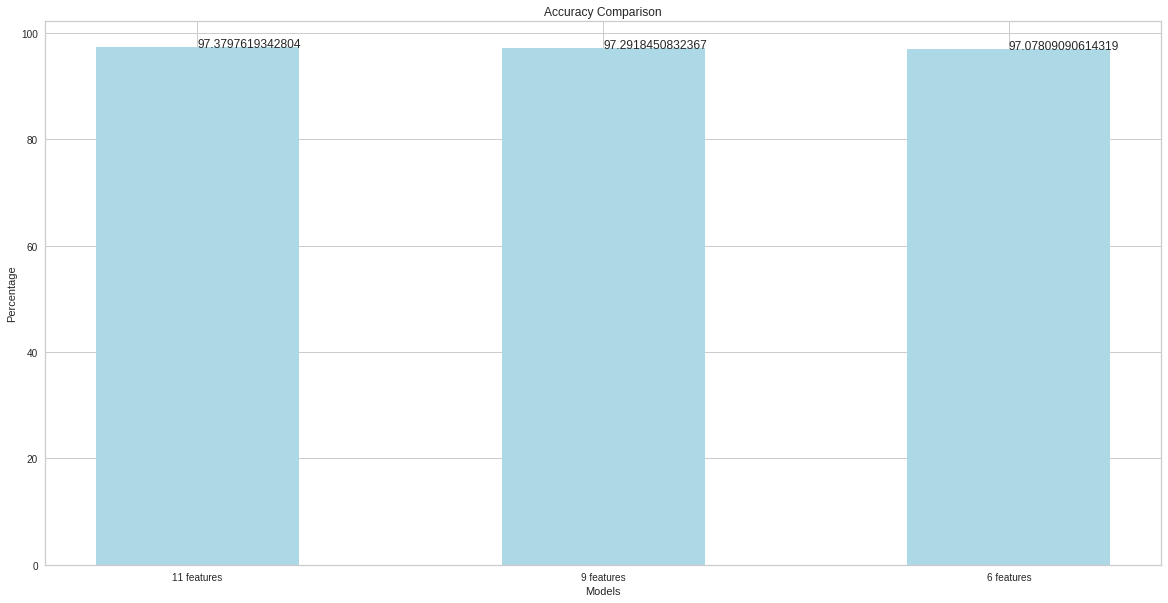

In [161]:
data_dict = {'11 features':ann_score_*100, '9 features':ann2_score_*100, '6 features':ann3_score_*100 }
models = list(data_dict.keys())
values = list(data_dict.values())

fig = plt.figure(figsize = (20, 10))
#  Bar plot
plt.bar(models, values, color ='lightblue',width = 0.5)
addlabels(models,values)
plt.xlabel("Models")
plt.ylabel("Percentage")
plt.title("Accuracy Comparison")
plt.show()